In this data type we have to predict the prices in the different type of restaurants and criterias like place, 
type of dish, which locality, what are the rating we would predict the cost. 
This is continous type of data are we are going to use linear regression further

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [33]:
ro=pd.read_csv('Restro.csv')
ro

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


We will drop the columns of Restro Id and Time as they dont affect the cost of any dishes in the restro generally.

In [3]:
rt=ro.drop(['RESTAURANT_ID','TIME'], axis=1)

In [4]:
rt.dtypes

TITLE       object
CUISINES    object
CITY        object
LOCALITY    object
RATING      object
VOTES       object
COST         int64
dtype: object

In [5]:
rt.isnull().sum()

TITLE          0
CUISINES       0
CITY         112
LOCALITY      98
RATING         2
VOTES       1204
COST           0
dtype: int64

Now we try to replace the null values from mode or the mean depending upon the categorical data and numerical data respectively.

In [6]:
rt['CITY']=rt['CITY'].fillna(rt['CITY'].mode()[0])
rt['LOCALITY']=rt['LOCALITY'].fillna(rt['LOCALITY'].mode()[0])
rt['VOTES']=rt['VOTES'].fillna(rt['VOTES'].mode()[0])

In [7]:
rt.dropna(inplace=True)

In [8]:
rt.isnull().sum()

TITLE       0
CUISINES    0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [9]:
rt.dtypes

TITLE       object
CUISINES    object
CITY        object
LOCALITY    object
RATING      object
VOTES       object
COST         int64
dtype: object

we need to convert the catergorical data into numerical data.

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
rt['TITLE']=le.fit_transform(rt['TITLE'])
rt['CUISINES']=le.fit_transform(rt['CUISINES'])
rt['CITY']=le.fit_transform(rt['CITY'])
rt['LOCALITY']=le.fit_transform(rt['LOCALITY'])
rt['RATING']=le.fit_transform(rt['RATING'])
rt['VOTES']=le.fit_transform(rt['VOTES'])

In [11]:
rt.dtypes

TITLE       int32
CUISINES    int32
CITY        int32
LOCALITY    int32
RATING      int32
VOTES       int32
COST        int64
dtype: object

In [12]:
rt

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,320,285,17,1278,1200
1,33,289,67,1046,23,950,1500
2,31,2976,67,1101,19,712,800
3,95,4130,222,136,22,787,800
4,50,1766,222,620,19,470,300
...,...,...,...,...,...,...,...
12685,95,2934,131,342,19,1349,500
12686,33,2143,222,133,24,191,1800
12687,71,2088,239,1342,21,1428,1300
12688,31,3506,67,631,16,996,400


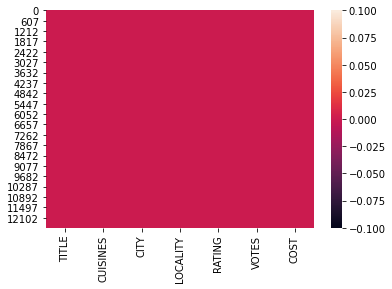

In [13]:
sns.heatmap(rt.isnull())

In [14]:
rt.describe()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
count,12688.000000,12688.000000,12688.000000,12688.000000,12688.000000,12688.000000,12688.000000
mean,59.473361,2235.447431,142.279871,652.430091,18.795712,991.410388,655.312185
std,32.759066,1204.012469,83.927540,399.121856,6.181820,482.561987,627.034073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,1186.750000,67.000000,337.000000,16.000000,619.000000,300.000000
50%,59.000000,2417.500000,131.000000,582.000000,19.000000,1100.000000,500.000000
75%,95.000000,3223.250000,222.000000,1009.000000,22.000000,1341.000000,800.000000
max,112.000000,4154.000000,358.000000,1415.000000,31.000000,1846.000000,14000.000000


In [15]:
rt.corr()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.244622,-0.016244,0.026513,-0.039710,0.009860,-0.263785
CUISINES,0.244622,1.000000,0.023968,0.016402,-0.038128,-0.001815,-0.014212
CITY,-0.016244,0.023968,1.000000,0.043060,0.026133,0.012726,0.044572
LOCALITY,0.026513,0.016402,0.043060,1.000000,-0.023344,0.005502,-0.015097
RATING,-0.039710,-0.038128,0.026133,-0.023344,1.000000,-0.010123,0.236967
VOTES,0.009860,-0.001815,0.012726,0.005502,-0.010123,1.000000,-0.013673
COST,-0.263785,-0.014212,0.044572,-0.015097,0.236967,-0.013673,1.000000


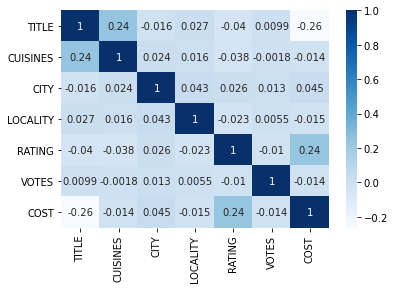

In [16]:
sns.heatmap(rt.corr(), cmap='Blues', annot=True)

In [18]:
rt.columns

Index(['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST'], dtype='object')

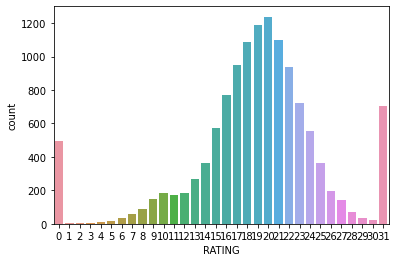

In [20]:
sns.countplot(rt['RATING'])

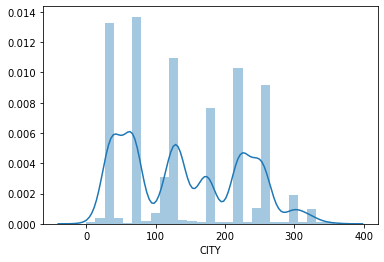

In [23]:
sns.distplot(rt['CITY'])

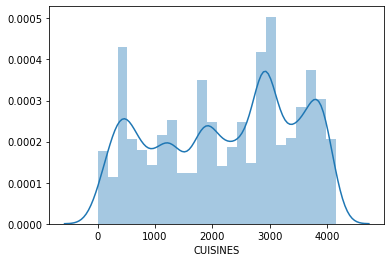

In [25]:
sns.distplot(rt['CUISINES'])

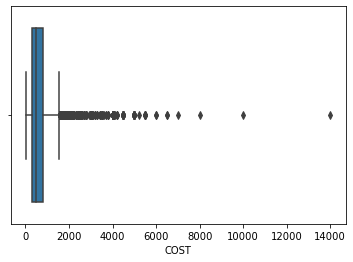

In [26]:
sns.boxplot(rt['COST'])

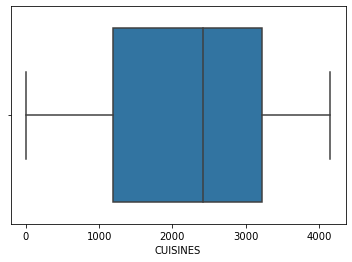

In [27]:
sns.boxplot(rt['CUISINES'])

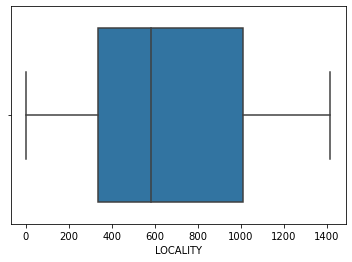

In [28]:
sns.boxplot(rt['LOCALITY'])

{'whiskers': [<matplotlib.lines.Line2D at 0x165925b0>,
 'caps': [<matplotlib.lines.Line2D at 0x16592c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x16592250>],
 'medians': [<matplotlib.lines.Line2D at 0x1659a370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1659a670>],
 'means': []}

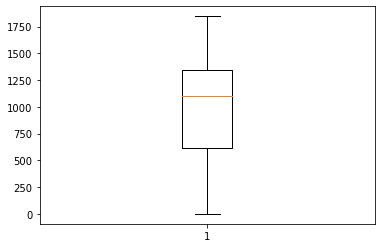

In [29]:
plt.boxplot(rt['VOTES'])

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(rt))
re=rt[(z<3).all(axis=1)]
re

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,320,285,17,1278,1200
1,33,289,67,1046,23,950,1500
2,31,2976,67,1101,19,712,800
3,95,4130,222,136,22,787,800
4,50,1766,222,620,19,470,300
...,...,...,...,...,...,...,...
12685,95,2934,131,342,19,1349,500
12686,33,2143,222,133,24,191,1800
12687,71,2088,239,1342,21,1428,1300
12688,31,3506,67,631,16,996,400


In [34]:
re.skew()

TITLE      -0.071951
CUISINES   -0.216449
CITY        0.306653
LOCALITY    0.344255
RATING      0.143095
VOTES      -0.263494
COST        1.737368
dtype: float64

In [35]:
rs=re.copy()

(array([2174., 4941., 1896., 1299.,  465.,  552.,  168.,  311.,   50.,
         114.]),
 array([  50.,  295.,  540.,  785., 1030., 1275., 1520., 1765., 2010.,
        2255., 2500.]),
 <a list of 10 Patch objects>)

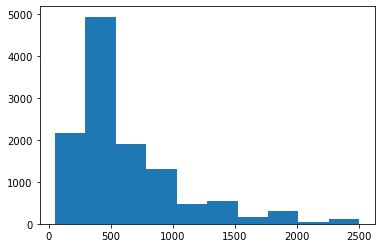

In [38]:
plt.hist(re['COST'])

In [36]:
rs['COST']=np.log1p(rs['COST'])

(array([   8.,  162.,  439.,  932., 2665., 2909., 1896., 1425., 1008.,
         526.]),
 array([3.93182563, 4.32108766, 4.71034969, 5.09961172, 5.48887375,
        5.87813578, 6.26739781, 6.65665984, 7.04592187, 7.4351839 ,
        7.82444593]),
 <a list of 10 Patch objects>)

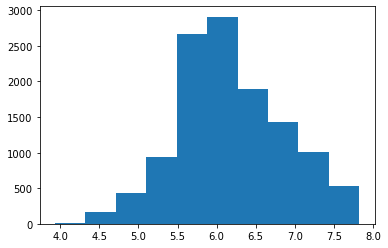

In [39]:
plt.hist(rs['COST'])

In [37]:
rs.skew()

TITLE      -0.071951
CUISINES   -0.216449
CITY        0.306653
LOCALITY    0.344255
RATING      0.143095
VOTES      -0.263494
COST        0.175599
dtype: float64

In [41]:
x=rs.iloc[:,0:-1]
y=rs.iloc[:,-1]

In [42]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for rstate in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate, test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_yl=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred_yl)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 80 to the r2 Score is 0.24921674555267093


In [50]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=80, test_size=0.20)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_yl=lr.predict(x_test)
r2_scr=r2_score(y_test,pred_yl)
r2_scr

0.21473358824478495

In [52]:
from sklearn.model_selection import cross_val_score
crs_val_scr=cross_val_score(lr,x,y,scoring='r2',cv=5).mean()
crs_val_scr

0.22247735614495037

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000]}
grrb=GridSearchCV(gbr,parameters,cv=5)
grrb.fit(x,y)
grrb.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [54]:
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000)
print('The cross Val Score',cross_val_score(gbr,x,y,cv=5, scoring='r2').mean())

The cross Val Score 0.6938773772817056


In [55]:
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_y=gbr.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print(mean_squared_error(y_test,pred_y))

r2 score 0.6379322687973294
0.16294277220233525


In [56]:
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')
adc=AdaBoostRegressor()
parameters={'n_estimators':[10,100,500,1000],'learning_rate':[0.001,0.01,0.1,1] }
gsv=GridSearchCV(adc,parameters,cv=5)
gsv.fit(x,y)
gsv.best_params_

{'learning_rate': 1, 'n_estimators': 10}

In [57]:
adc=AdaBoostRegressor(learning_rate=1, n_estimators=10)
print('The cross Val Score',cross_val_score(adc,x,y,cv=5, scoring='r2').mean())

The cross Val Score 0.36306698548079913


we can see here that gradient booster gives us better results than any other algorithm, so picked that and saved it.

In [58]:
df1=pd.DataFrame(pred_y)
df1.to_csv('gbr_prediction.csv')

In [59]:
import joblib
joblib.dump(gbr,'gbr_Restro.pkl')

['gbr_Restro.pkl']